Now that you have some practice solving recurrences, let's work on
  implementing some algorithms. In lecture we discussed a divide and
  conquer algorithm for integer multiplication. This algorithm takes
  as input two $n$-bit strings $x = \langle x_L, x_R\rangle$ and
  $y=\langle y_L, y_R\rangle$ and computes the product $xy$ by using
  the fact that $xy = 2^{n/2}x_Ly_L + 2^{n/2}(x_Ly_R+x_Ry_L) +
  x_Ry_R.$ Write the algorithm specification in SPARC. Then, use the
  stub functions in `main.py` to implement two algorithms for integer
  multiplication: a divide and conquer algorithm that runs in
  quadratic time. Then test the empirical running times across a
  variety of inputs to test whether your code scales in the manner
  described by the asymptotic runtime.

The computation we must implement is:

$\begin{align}
x\cdot y &=& (2^{n/2} x_L + x_R)(2^{n/2} y_L + y_R) \\
 &=& 2^n (x_L \cdot y_L) + 2^{n/2} (x_L \cdot y_R + x_R \cdot y_L) + (x_R \cdot y_R) \\
\end{align}
$

    
First, we'll define our entry point, which calls a helper function `_quadratic_multiply`. This returns a BinaryNumber, which we convert to a decimal value for testing purposes:

```python
def quadratic_multiply(x, y):
    # this just converts the result from a BinaryNumber to a regular int
    return _quadratic_multiply(x,y).decimal_val
```

We'll also use two helper functions to split the binary vector and convert binary vectors to int are:

```python
def binary2int(binary_vec): 
    if len(binary_vec) == 0:
        return BinaryNumber(0)
    return BinaryNumber(int(''.join(binary_vec), 2))

def split_number(vec):
    return (binary2int(vec[:len(vec)//2]),
            binary2int(vec[len(vec)//2:]))
```

and here is how we can do a bit shift needed for the $2^n$ part:

```python
def bit_shift(number, n):
    # append n 0s to this number's binary string
    return binary2int(number.binary_vec + ['0'] * n)
```

The implementation of `_quadratic_multiply` will do the following:

1. Obtain `xvec` and `yvec`, the `binary_vec` values of `x` and `y`
2. Pad `xvec` and `yvec` so they are the same length by adding leading 0s if necessary (e.g., if `xvec`=1 and `yvec`=10, then change `xvec` to 01. This will ensure our splitting and recombining will work properly.
3. Base case: If both $x$ and $y$ are $\le 1$, then just return their product.
4. Otherwise, split `xvec` and `yvec` into two halves each. Call them `x_left` `x_right` `y_left` `y_right`.
5. Now you can apply the formula above directly. Anywhere there is a multiply, call `_quadratic_multiply`
6. Use `bit_shift` to do the $2^n$ and $2^{n/2}$ multiplications.
7. Finally, you have to do three sums to get the final answer. For this assignment, you can just use the `decimal_val`s of each number to do this, though keep in mind that binary addition is a $O(n)$ operation, assuming $n$ bits per term.


In [1]:
import time

class BinaryNumber:
    """ done """
    def __init__(self, n):
        self.decimal_val = n               
        self.binary_vec = list('{0:b}'.format(n))
        
    def __repr__(self):
        return('decimal=%d binary=%s' % (self.decimal_val, ''.join(self.binary_vec)))
    

## Implement multiplication functions here. Note that you will have to
## ensure that x, y are appropriately sized binary vectors for a
## divide and conquer approach.
def binary2int(binary_vec): 
    if len(binary_vec) == 0:
        return BinaryNumber(0)
    return BinaryNumber(int(''.join(binary_vec), 2))

def split_number(vec):
    return (binary2int(vec[:len(vec)//2]),
            binary2int(vec[len(vec)//2:]))

def bit_shift(number, n):
    # append n 0s to this number's binary string
    return binary2int(number.binary_vec + ['0'] * n)
    
def pad(x,y):
    # pad with leading 0 if x/y have different number of bits
    # e.g., [1,0] vs [1]
    if len(x) < len(y):
        x = ['0'] * (len(y)-len(x)) + x
    elif len(y) < len(x):
        y = ['0'] * (len(x)-len(y)) + y
    # pad with leading 0 if not even number of bits
    if len(x) % 2 != 0:
        x = ['0'] + x
        y = ['0'] + y
    return x,y
    
def quadratic_multiply(x, y):
    # this just converts the result from a BinaryNumber to a regular int
    return _quadratic_multiply(x,y).decimal_val

def _quadratic_multiply(x, y):
    xvec = x.binary_vec
    yvec = y.binary_vec
    xvec, yvec = pad(xvec, yvec)
    #print('   '*len(xvec), xvec, yvec)
    if x.decimal_val <= 1 and y.decimal_val <= 1:
        return BinaryNumber(x.decimal_val * y.decimal_val)
    
    # 4 recursive calls
    x_left, x_right = split_number(xvec)
    y_left, y_right = split_number(yvec)
    # x_L * y_L
    left_product = _quadratic_multiply(x_left, y_left)
    # x_R * y_R
    right_product = _quadratic_multiply(x_right, y_right)
    # x_L * y_R
    left_right_product = _quadratic_multiply(x_left, y_right)
    # x_R * y_L
    right_left_product = _quadratic_multiply(x_right, y_left)
    
    # O(n) addition: x_L*y_R + x_R*y_L
    middle_term = BinaryNumber(left_right_product.decimal_val +
                               right_left_product.decimal_val)
    # 2^{n/2} (x_L*y_R + x_R*y_L)
    middle_term = bit_shift(middle_term, len(xvec)//2)
    
    # 2^n (x_L * y_L)
    left_product = bit_shift(left_product, len(xvec))
    
    # O(n) addition
    return BinaryNumber(left_product.decimal_val +
                        middle_term.decimal_val +
                        right_product.decimal_val)


## Feel free to add your own tests here.
def test_multiply():
    assert quadratic_multiply(BinaryNumber(2), BinaryNumber(2)) == 2*2
    assert quadratic_multiply(BinaryNumber(8), BinaryNumber(8)) == 8*8
    assert quadratic_multiply(BinaryNumber(9), BinaryNumber(8)) == 9*8
    assert quadratic_multiply(BinaryNumber(10), BinaryNumber(10)) == 10*10

test_multiply()
#quadratic_multiply(BinaryNumber(8), BinaryNumber(9))

In [2]:
# binary2int(['0', '1'])
BinaryNumber(9).binary_vec

['1', '0', '0', '1']



|          n |   quadratic |
|------------|-------------|
|         10 |       0.114 |
|        100 |       0.250 |
|       1000 |       0.812 |
|      10000 |       0.975 |
|     100000 |       1.229 |
|    1000000 |       2.283 |
|   10000000 |       2.456 |
|  100000000 |       3.494 |
| 1000000000 |       4.408 |


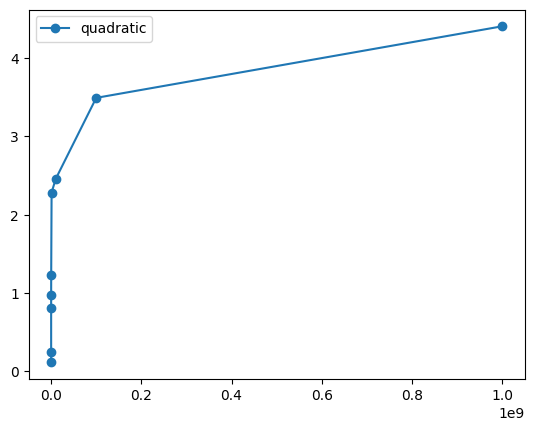

In [7]:
import tabulate
import matplotlib.pyplot as plt


def time_multiply(x, y, f):
    start = time.time()
    # multiply two numbers x, y using function f
    f(x,y)
    return (time.time() - start)*1000
    
def compare_multiply():
    res = []
    ns = [10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]
    for n in ns:
        qtime = time_multiply(BinaryNumber(n), BinaryNumber(n), quadratic_multiply)
        res.append((n, qtime))
    print_results(res)
    
    plt.figure()
    plt.plot(ns, [r[1] for r in res], 'o-', label='quadratic')
    plt.legend()
    plt.show()


def print_results(results):
    print("\n")
    print(
        tabulate.tabulate(
            results,
            headers=['n', 'quadratic'],
            floatfmt=".3f",
            tablefmt="github"))
    
    
compare_multiply()